In [12]:
from pathlib import Path
import numpy as np
import datetime
import netCDF4
import xarray as xr
import matplotlib.pyplot as plt
import pyproj
from pyproj import Transformer
from pyproj import CRS
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import hvplot.xarray
import panel as pn
import panel.widgets as pnw
import ipywidgets as ipw

In [3]:
def read_file_paths(filename):
    this_dir=Path.cwd()
    data_dir=this_dir.parent/Path("Data")
    files = data_dir.rglob(filename)
    for i in files:
        data = i
    return data

        
def find_racmo_for_insitu_data(dataset,v,in_situ_site):
    data_v= dataset[v]
    time_series = data_v.sel(rlon=in_situ_site[0], rlat=in_situ_site[1], method='nearest')
    return time_series      

def find_anomaly(dataset):
    return dataset - dataset.mean(dim='time')

In [4]:
data_crs=CRS('-m 57.295779506 +proj=ob_tran +o_proj=latlon +o_lat_p=-180.0 +lon_0=30.0 +o_lon_p=0')
from_lat_lon_crs = CRS.from_proj4("+proj=latlon")
transproj = Transformer.from_crs(from_lat_lon_crs, data_crs)

#SPRI AWS STATION COORDINATE
AWSlon = -67.69971
AWSlat = -71.14409

#BAS FOSSIL BLUFF AWS STATION COORDINATE
BAS_FB_lon = -68
BAS_FB_lat = -71.329

##SPRI AWS STATION ROTATED
aws_rotated=transproj.transform(AWSlon,AWSlat)
print('AWS rotated = ',aws_rotated)


##BAS FOSSIL BLUFF AWS STATION ROTATED
bas_fb_rotated=transproj.transform(BAS_FB_lon,BAS_FB_lat)
print('BAS Fossil Bluff rotated = ',bas_fb_rotated)

AWS rotated =  (-18.69776623671606, -2.481756537563884)
BAS Fossil Bluff rotated =  (-18.501719991296497, -2.5536000532157934)


In [8]:
sp=xr.open_dataset(read_file_paths('surface_pressure.nc')) 

In [9]:
aws_wind=find_racmo_for_insitu_data(sp,'psurf',aws_rotated)
fb_wind=find_racmo_for_insitu_data(sp,'psurf',bas_fb_rotated)

C:\Users\Pearl\anaconda3\envs\dissenv\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
C:\Users\Pearl\anaconda3\envs\dissenv\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
C:\Users\Pearl\anaconda3\envs\dissenv\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
C:\Users\Pearl\anaconda3\envs\dissenv\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version.

In [10]:
sp.psurf.hvplot()

:NdOverlay   [Element]
   :Histogram   [psurf]   (psurf_count)

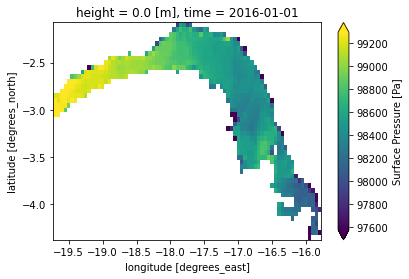

In [11]:
sp.psurf.isel(time=0).plot(robust=True)


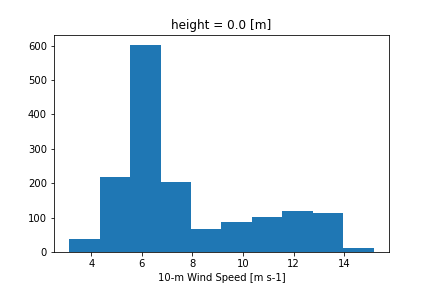

In [11]:
x=wind.ff10m.squeeze()
x.interactive.sel(time=pnw.DiscreteSlider).plot()

In [12]:
wind.ff10m.squeeze()

<xarray.DataArray 'ff10m' (time: 14592, rlat: 46, rlon: 79)>
[53027328 values with dtype=float32]
Coordinates:
  * rlat     (rlat) float64 -4.35 -4.3 -4.25 -4.2 ... -2.25 -2.2 -2.15 -2.1
  * rlon     (rlon) float64 -19.7 -19.65 -19.6 -19.55 ... -15.9 -15.85 -15.8
    lon      (rlat, rlon) float64 ...
    lat      (rlat, rlon) float64 ...
    height   float64 0.0
  * time     (time) datetime64[ns] 2016-01-01 ... 2020-12-31T21:00:00
Attributes:
    standard_name:  wind_speed
    long_name:      10-m Wind Speed
    units:          m s-1
    cell_methods:   time: instantaneous values
    grid_mapping:   rotated_pole


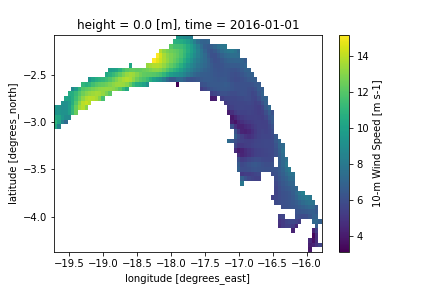

In [19]:
x=wind.ff10m.squeeze()
x.interactive(loc='bottom').isel(time=pnw.Player(name='time')).plot()

In [21]:
zonal_wind=xr.open_dataset(read_file_paths('10m_zonal_wind_speed.nc')) 

In [22]:
zonal_wind

<xarray.Dataset>
Dimensions:       (rlat: 46, rlon: 79, height: 1, time: 7768)
Coordinates:
  * rlat          (rlat) float64 -4.35 -4.3 -4.25 -4.2 ... -2.25 -2.2 -2.15 -2.1
  * rlon          (rlon) float64 -19.7 -19.65 -19.6 ... -15.9 -15.85 -15.8
    lon           (rlat, rlon) float64 ...
    lat           (rlat, rlon) float64 ...
  * height        (height) float64 0.0
  * time          (time) datetime64[ns] 2016-01-01 ... 2021-02-28T21:00:00
Data variables:
    rotated_pole  int32 ...
    u10m          (time, height, rlat, rlon) float32 ...
Attributes:
    Conventions:   CF-1.4
    source:        RACMO2
    Domain:        XPEN055
    Experiment:    ERA5-3H_RACMO2.3p2
    institution:   Royal Netherlands Meteorological Institute (KNMI)
    CreationDate:  Fri Jun 18 19:37:58 2021
    comment:       asim2cdf: cpar=u10m, iwmo=33, ilvt=105, ilev=10, idh=3, ih...
    title:         10-m Zonal Wind Speed


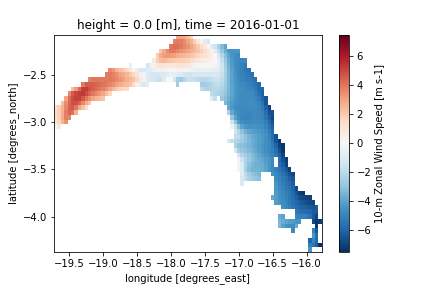

In [23]:
y=zonal_wind.u10m.squeeze()
y.interactive(loc='bottom').isel(time=pnw.Player(name='time')).plot()